# Programación genética

Este código está basado en los ejemplos de la documentación de la librería "DEAP" del repositorio del proyecto. Esté código es una adaptación para que puedan funcionar con los problemas de la tarea, paridad y regresión de los números aleatorios.


DEAP es una paquetería para python que nos permite el desarrollo de algoritmos evolutivos y programación genética. Su funcionamiento tiene cuatro componentes principales:
* <u>**Primitive:**</u> Son las funciones y terminales que se permite usar para la generación de árboles.
* <u>**Toolbox:**</u> Una clase la cual contiene una serie de "herramientas" requeridas para poder aplicar los operadores genéticos a nuestra población. **seleccion, cruza, mutacion, evaluaciones, generación de individuos, etc.**
* <u>**Statistics:**</u> Clase que nos permite recopilar variables sobre la evaluación y ejecucion de los individuos a lo largo de las generaciones. Como el mejor(Hall of Fame), promedio, fitness, etc.
* <u>**Creator:**</u> Clase que nos permite crear nuevas clases de individuos y poblaciones vinculados con el tipo de fitness (minimizando/maximizando)


# Problema de paridad

In [1]:
import random
import operator

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import csv

In [2]:
# Cargamos la data de entrenamiento
with open('Paridad.csv', 'r') as f:
    reader = csv.reader(f)
    data = [(int(row[0]), int(row[1]), int(row[2]), int(row[3])) for row in reader]

# Definimos la funcion de evaluación para el problema de paridad
def evaluacion(individual):
    func = toolbox.compile(expr=individual)
    return sum(func(x, y, z) == out for (x, y, z, out) in data),


### Definicion del set de nodos terminales y funciones
Creamos nuestro set de variables de terminales y funciones para solucionar el problema de paridad. En cada addPrimitive() se define el operador y la aridad de la función.

In [41]:
pset = gp.PrimitiveSet("Paridad", 3, "var")
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addPrimitive(operator.xor, 2) # Se correran pruebas incluyendo y excluyendo el operador XOR

pset.addTerminal(1)
pset.addTerminal(0)

### Creamos la funcion para fitness y el individuo que se evaluará bajo esa métrica.

Los pesos al crear la clase para Fitness es 1.0 porque estamos buscando maximizar la metrica de evaluación (El número de aciertos).

In [3]:
creator.create("fitness_ind", base.Fitness, weights=(1.0,))
creator.create("individuo", gp.PrimitiveTree, fitness=creator.fitness_ind)

### Crear el toolbox
En este paso se crea el toolbox que contendrá las funciones para que podamos realizar mutación, cruza, selección, evaluación, etc.

In [66]:
toolbox = base.Toolbox()
toolbox.register("arbol", gp.genFull, pset=pset, min_=3, max_=4) # Genera todo el arbol con minima y maxima profundidad definica
toolbox.register("ind", tools.initIterate, creator.individuo, toolbox.arbol) # Se define el individuo relacionado con la expresion 
toolbox.register("poblacion", tools.initRepeat, list, toolbox.ind) # Se define la poblacion de individuos
toolbox.register("select", tools.selStochasticUniversalSampling) # Seleccionamos individuos para la reproduccion por muestreo
# toolbox.register("select", tools.selTournament, tournsize=3) # Seleccionamos individuos para la reproduccion por torneo
toolbox.register("mate", gp.cxOnePoint) # Se define una cruza en un punto donde los hijos tendrán la profundidad de cada uno de los padres
toolbox.register("arbol_mut", gp.genGrow, min_=0, max_=2) #  Como se creara el arbol de mutacion (con profundidad max y min)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.arbol_mut, pset=pset) # Se define un punto de mutación y se inserta el arbol de mutación
toolbox.register("evaluate", evaluacion) # Integramos la función de evaluacion al toolbox
toolbox.register("compile", gp.compile, pset=pset) # Se toma un arbol y se compila en funcion  toolbox.compile(expr) compila al individuo




def correr_algoritmo():
    n_poblacion = 100
    generaciones = 100
    prob_cruza = 0.7
    prob_mutacion = 0.15

    pop = toolbox.poblacion(n=n_poblacion)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("max", numpy.max)
    hof = tools.HallOfFame(1)
    pop, logbook = algorithms.eaSimple(pop, toolbox, prob_cruza, prob_mutacion, generaciones, stats, halloffame=hof, verbose=False)

    return pop, stats, hof, logbook


pop, stats, hof, logbook = correr_algoritmo()

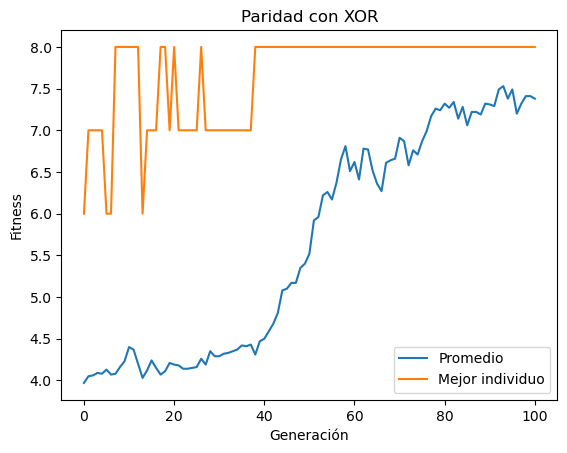

In [67]:
import matplotlib.pyplot as plt
gen, avg, max_ = logbook.select("gen", "avg", "max")
plt.title("Paridad con XOR")
plt.plot(gen, avg, label="Promedio")
plt.plot(gen, max_, label="Mejor individuo")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.legend()
plt.show()

In [70]:
# Ecuación del mejor individuo
print(hof[0])

xor(and_(and_(var2, var2), not_(and_(var1, 0))), and_(not_(xor(var0, var1)), not_(and_(var1, 0))))


### Sin usar XOR

In [6]:
pset = gp.PrimitiveSet("Paridad", 3, "var")
pset.addPrimitive(operator.and_, 2)
pset.addPrimitive(operator.or_, 2)
pset.addPrimitive(operator.not_, 1)
pset.addTerminal(1)
pset.addTerminal(0)

toolbox = base.Toolbox()
toolbox.register("arbol", gp.genFull, pset=pset, min_=3, max_=4) # Genera todo el arbol con minima y maxima profundidad definica
toolbox.register("ind", tools.initIterate, creator.individuo, toolbox.arbol) # Se define el individuo relacionado con la expresion 
toolbox.register("poblacion", tools.initRepeat, list, toolbox.ind) # Se define la poblacion de individuos
toolbox.register("select", tools.selStochasticUniversalSampling) # Seleccionamos individuos para la reproduccion por muestreo
# toolbox.register("select", tools.selTournament, tournsize=3) # Seleccionamos individuos para la reproduccion por torneo
toolbox.register("mate", gp.cxOnePoint) # Se defune una cruza en un punto donde los hijos tendrán la profundidad de cada uno de los padres
toolbox.register("arbol_mut", gp.genGrow, min_=0, max_=2) #  Como se creara el arbol de mutacion (con profundidad max y min)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.arbol_mut, pset=pset) # Se define un punto de mutación y se inserta el arbol de mutación
toolbox.register("evaluate", evaluacion) # Integramos la función de evaluacion al toolbox
toolbox.register("compile", gp.compile, pset=pset) # Se toma un arbol y se compila en funcion  toolbox.compile(expr) compila al individuo
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17)) # Limitamos la altura de los individuos
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17)) # Limitamos la altura de los individuos

toolbox = base.Toolbox()
toolbox.register("arbol", gp.genFull, pset=pset, min_=3, max_=4) # Genera todo el arbol con minima y maxima profundidad definica
toolbox.register("ind", tools.initIterate, creator.individuo, toolbox.arbol) # Se define el individuo relacionado con la expresion 
toolbox.register("poblacion", tools.initRepeat, list, toolbox.ind) # Se define la poblacion de individuos
toolbox.register("select", tools.selStochasticUniversalSampling) # Seleccionamos individuos para la reproduccion por muestreo
# toolbox.register("select", tools.selTournament, tournsize=3) # Seleccionamos individuos para la reproduccion por torneo
toolbox.register("mate", gp.cxOnePoint) # Se defune una cruza en un punto donde los hijos tendrán la profundidad de cada uno de los padres
toolbox.register("arbol_mut", gp.genGrow, min_=0, max_=2) #  Como se creara el arbol de mutacion (con profundidad max y min)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.arbol_mut, pset=pset) # Se define un punto de mutación y se inserta el arbol de mutación
toolbox.register("evaluate", evaluacion) # Integramos la función de evaluacion al toolbox
toolbox.register("compile", gp.compile, pset=pset) # Se toma un arbol y se compila en funcion  toolbox.compile(expr) compila al individuo




def correr_algoritmo():
    n_poblacion = 100
    generaciones = 100
    prob_cruza = 0.7
    prob_mutacion = 0.15

    pop = toolbox.poblacion(n=n_poblacion)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("max", numpy.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, prob_cruza, prob_mutacion, generaciones, stats, halloffame=hof, verbose=False)

    return pop, stats, hof, logbook


pop, stats, hof, logbook = correr_algoritmo()



In [7]:
pop, stats, hof, logbook = correr_algoritmo()

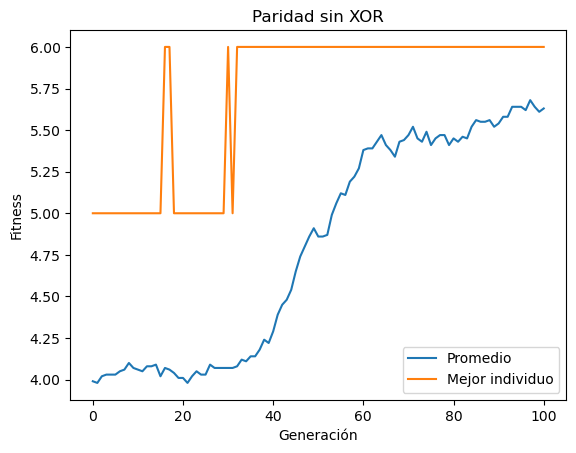

In [9]:
import matplotlib.pyplot as plt
gen, avg, max_ = logbook.select("gen", "avg", "max")
plt.title("Paridad sin XOR")
plt.plot(gen, avg, label="Promedio")
plt.plot(gen, max_, label="Mejor individuo")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.legend()
plt.show()

In [8]:
print(hof[0])

and_(or_(and_(var0, or_(var1, not_(var0))), var2), or_(or_(var1, and_(0, and_(var0, var1))), var0))


# Regresion simbólica

In [4]:
import csv
import math
import numpy as np
from functools import partial 


with open('Reg_Simbolica.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    data = data[1:]
    data = [(int(x), int(fx)) for x, fx in data]

def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    sqerrors = ((func(x) - y)**2 for x, y in points)
    return math.fsum(sqerrors) / len(points), # error medio cuadrático

def protectedDiv(left, right):
    '''Funcion para division protegida'''
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    

### Definicion del set de nodos terminales y funciones

In [32]:
pset = gp.PrimitiveSet("RegS", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addEphemeralConstant("ks", partial(random.randint, -1, 1))
pset.renameArguments(ARG0='x')


### Creamos la funcion para fitness y el individuo que se evaluará bajo esa métrica.

In [33]:
creator.create("fitness_reg", base.Fitness, weights=(-1.0,)) # -1.0 para minimizar el error medio cuadrático
creator.create("individuo", gp.PrimitiveTree, fitness=creator.fitness_reg)

### Crear el toolbox con todas las funciones necesarias para evolucionar la población.

In [42]:
toolbox = base.Toolbox()
toolbox.register("arbol", gp.genGrow, pset=pset, min_=1, max_=6)
toolbox.register("ind", tools.initIterate, creator.individuo, toolbox.arbol)
toolbox.register("poblacion", tools.initRepeat, list, toolbox.ind)

toolbox.register("evaluate", evalSymbReg, points=data)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selStochasticUniversalSampling) # No corre con Muestreo estocástico
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("arbol_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.arbol_mut, pset=pset)
toolbox.register("compile", gp.compile, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17)) # definimos un limite para el tamaño de la cruza
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17)) # definimos un limite para el tamaño de la mutacion




In [ ]:
def correr_algoritmo():
    n_poblacion = 150
    generaciones = 200
    prob_cruza = 0.7
    prob_mutacion = 0.15

    pop = toolbox.poblacion(n=n_poblacion)
    hof = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("min", numpy.min)

    pop, log = algorithms.eaSimple(pop, toolbox, prob_cruza, prob_mutacion, generaciones, stats=mstats,halloffame=hof, verbose=False)
    return pop, log, hof


pop, log, hof = correr_algoritmo()

In [43]:
print(hof[0])

sub(sub(sub(add(sub(-1, add(-1, neg(sub(add(cos(x), add(cos(x), 1)), add(cos(sub(sub(protectedDiv(-1, protectedDiv(0, cos(-1))), x), x)), -1))))), sub(sub(protectedDiv(-1, protectedDiv(add(cos(sub(0, cos(-1))), add(sub(sub(protectedDiv(add(cos(-1), add(x, x)), protectedDiv(1, cos(protectedDiv(sub(-1, x), neg(1))))), x), sub(0, x)), -1)), -1)), x), add(cos(-1), sub(neg(sub(add(cos(neg(x)), add(sub(sub(x, x), sub(-1, add(cos(x), add(x, 1)))), 1)), add(cos(1), neg(-1)))), add(add(cos(sub(0, x)), add(sub(protectedDiv(1, cos(protectedDiv(sub(-1, 1), neg(x)))), add(-1, add(protectedDiv(sub(-1, cos(x)), cos(x)), 1))), 0)), add(cos(-1), add(protectedDiv(sub(sub(protectedDiv(-1, protectedDiv(0, cos(1))), x), sub(-1, add(cos(x), add(x, 1)))), cos(protectedDiv(sub(-1, 1), neg(x)))), 1))))))), add(sub(-1, add(cos(cos(protectedDiv(sub(-1, 1), protectedDiv(sub(-1, cos(x)), neg(x))))), add(cos(sub(cos(x), x)), add(cos(sub(0, x)), add(sub(sub(protectedDiv(1, cos(protectedDiv(sub(-1, 1), protectedDiv(s

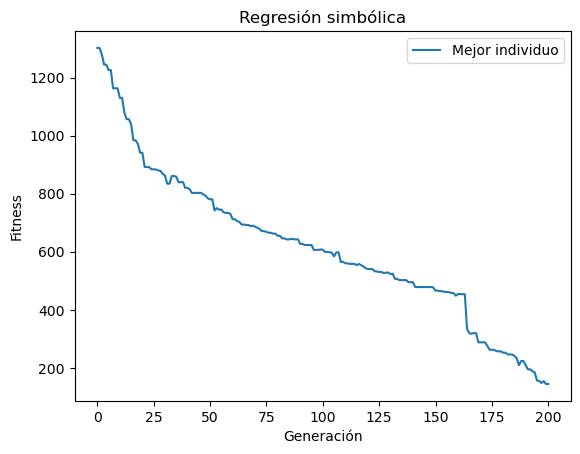

In [45]:
import matplotlib.pyplot as plt

gen = log.select("gen")
# fit_avg = log.chapters["fitness"].select("avg")
# plt.plot(gen, fit_avg, label="promedio")
fit_min = log.chapters["fitness"].select("min")
plt.plot(gen, fit_min, label="Mejor individuo")

plt.title("Regresión simbólica")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.legend()
plt.show()

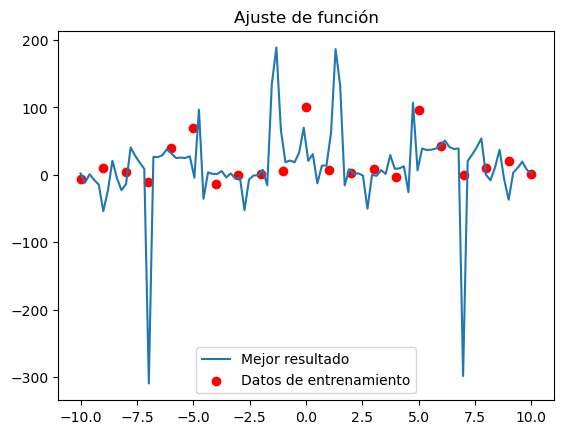

In [47]:
import numpy as np
x = np.linspace(-10, 10, 100)
y = [func(x_) for x_ in x]
plt.title("Ajuste de función")
plt.plot(x, y, label="Mejor resultado")
x, y = zip(*data)
plt.scatter(x, y, label="Datos de entrenamiento", color="red")
plt.legend()
plt.show()


In [48]:
print(hof[0])
print("Fitness: ", hof[0].fitness.values)

sub(sub(sub(add(sub(-1, add(-1, neg(sub(add(cos(x), add(cos(x), 1)), add(cos(sub(sub(protectedDiv(-1, protectedDiv(0, cos(-1))), x), x)), -1))))), sub(sub(protectedDiv(-1, protectedDiv(add(cos(sub(0, cos(-1))), add(sub(sub(protectedDiv(add(cos(-1), add(x, x)), protectedDiv(1, cos(protectedDiv(sub(-1, x), neg(1))))), x), sub(0, x)), -1)), -1)), x), add(cos(-1), sub(neg(sub(add(cos(neg(x)), add(sub(sub(x, x), sub(-1, add(cos(x), add(x, 1)))), 1)), add(cos(1), neg(-1)))), add(add(cos(sub(0, x)), add(sub(protectedDiv(1, cos(protectedDiv(sub(-1, 1), neg(x)))), add(-1, add(protectedDiv(sub(-1, cos(x)), cos(x)), 1))), 0)), add(cos(-1), add(protectedDiv(sub(sub(protectedDiv(-1, protectedDiv(0, cos(1))), x), sub(-1, add(cos(x), add(x, 1)))), cos(protectedDiv(sub(-1, 1), neg(x)))), 1))))))), add(sub(-1, add(cos(cos(protectedDiv(sub(-1, 1), protectedDiv(sub(-1, cos(x)), neg(x))))), add(cos(sub(cos(x), x)), add(cos(sub(0, x)), add(sub(sub(protectedDiv(1, cos(protectedDiv(sub(-1, 1), protectedDiv(s